<a href="https://colab.research.google.com/github/Deepika2167/Deepika-ML-project/blob/main/ML_Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

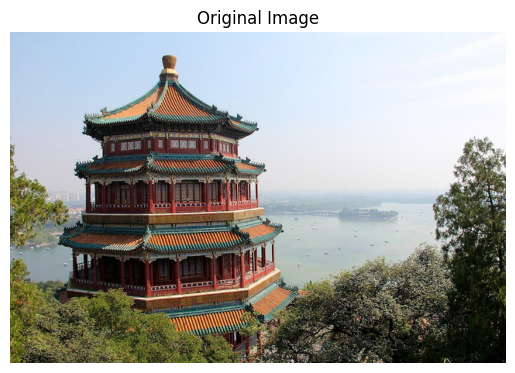

Image shape: (427, 640, 3)


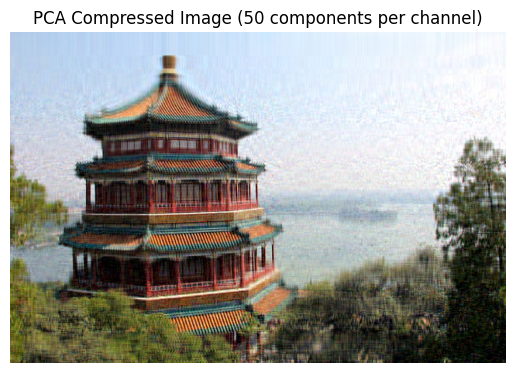

Average variance retained: 95.02%
Reconstruction error (MSE): 0.004649


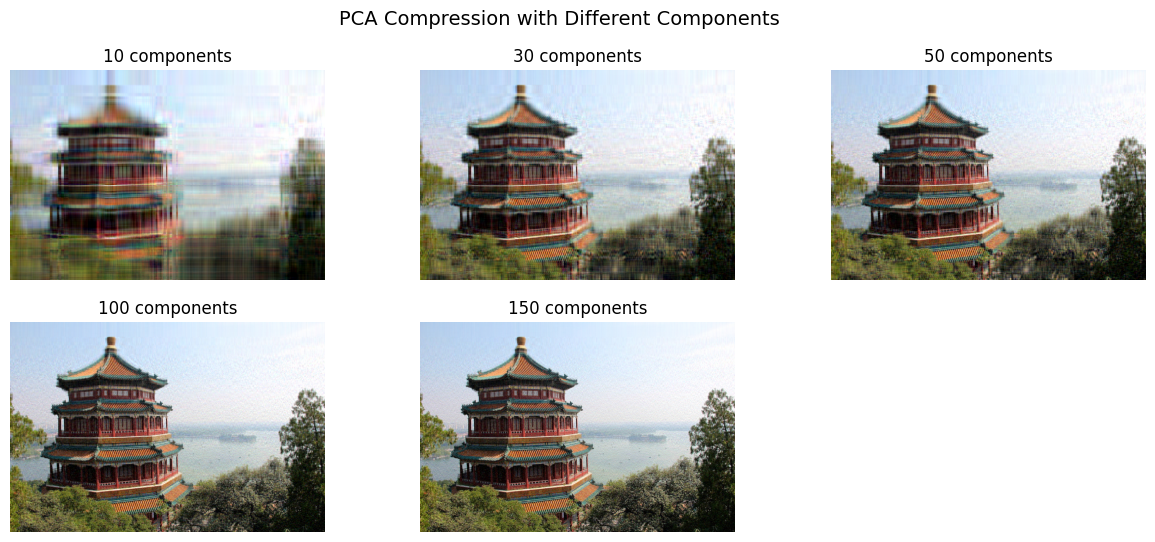

In [1]:
# ---------------------------------------------------------
# Project: PCA for Image Compression
# ---------------------------------------------------------
# Description: Reduce image dimensions using Principal Component Analysis (PCA)
# Learning Objective: Learn dimensionality reduction and image processing
# Algorithm: PCA
# Tools: Python, Scikit-learn, Matplotlib
# ---------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_sample_image

# ---------------------------------------------------------
# STEP 1: Load and preprocess the image
# ---------------------------------------------------------
# Load a sample image (you can replace with your own image file)
china = load_sample_image("china.jpg")

# Convert to float and normalize
image = np.array(china, dtype=float) / 255

# Display original image
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Get the shape of the image
h, w, c = image.shape
print(f"Image shape: {image.shape}")

# ---------------------------------------------------------
# STEP 2: Apply PCA on each color channel
# ---------------------------------------------------------
def apply_pca_channel(channel_data, n_components):
    """
    Apply PCA compression on a single channel.
    """
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(channel_data)
    reconstructed = pca.inverse_transform(transformed)
    return reconstructed, pca.explained_variance_ratio_.sum()

# Choose number of components (you can experiment)
n_components = 50

compressed_channels = []
variance_ratios = []

for i in range(c):  # For each color channel
    channel = image[:, :, i]
    reconstructed, var_retained = apply_pca_channel(channel, n_components)
    compressed_channels.append(reconstructed)
    variance_ratios.append(var_retained)

# Merge channels back
compressed_image = np.stack(compressed_channels, axis=2)

# ---------------------------------------------------------
# STEP 3: Display compressed image
# ---------------------------------------------------------
plt.imshow(np.clip(compressed_image, 0, 1))
plt.title(f"PCA Compressed Image ({n_components} components per channel)")
plt.axis("off")
plt.show()

# ---------------------------------------------------------
# STEP 4: Evaluate reconstruction quality
# ---------------------------------------------------------
# Compute reconstruction error (Mean Squared Error)
mse = np.mean((image - compressed_image) ** 2)
avg_variance = np.mean(variance_ratios)

print(f"Average variance retained: {avg_variance * 100:.2f}%")
print(f"Reconstruction error (MSE): {mse:.6f}")

# ---------------------------------------------------------
# STEP 5: Visualize effect of varying components
# ---------------------------------------------------------
components_list = [10, 30, 50, 100, 150]

plt.figure(figsize=(15, 6))
for idx, n in enumerate(components_list):
    temp_channels = []
    for i in range(c):
        channel = image[:, :, i]
        reconstructed, _ = apply_pca_channel(channel, n)
        temp_channels.append(reconstructed)
    temp_image = np.stack(temp_channels, axis=2)
    plt.subplot(2, 3, idx + 1)
    plt.imshow(np.clip(temp_image, 0, 1))
    plt.title(f"{n} components")
    plt.axis("off")

plt.suptitle("PCA Compression with Different Components", fontsize=14)
plt.show()

1) How many components are optimal?
  The number of components that retain 95–99% of total variance, found using a cumulative variance graph.

2) What variance is retained?
	 The percentage of total data variance preserved after dimensionality reduction. Usually ≥ 95%.
3) What is reconstruction error?
	 The difference between original and reconstructed images; lower error means better compression.
4) How to visualize components?
Plot the top eigenfaces or principal components using Matplotlib’s imshow().

5) How does PCA improve speed?
	 Reduces data size and dimensionality, making computation and storage faster.

6) What is eigenvalue/eigenvector?
Eigenvalues represent variance magnitude; eigenvectors show the direction of maximum variance.

7) How to apply PCA to images?
Flatten the image matrix, apply PCA, then inverse transform for reconstruction.

8)What is the impact on quality?
Slight loss of detail depending on number of components; visual quality remains high if variance retained ≥ 95%.

9) How does PCA differ from LDA?	PCA focuses on maximizing variance; LDA focuses on maximizing class separability.

10)How to use PCA in preprocessing?	PCA can be used to remove noise and reduce features before applying ML algorithms.



 1 Question: How to decide the number of components automatically using explained variance?

Answer:
The number of components can be selected by analyzing the cumulative explained variance ratio.
We choose the smallest number of components that retain a desired percentage (e.g., 95%) of total variance.


2 Question: Can PCA be combined with autoencoders for hybrid compression?

Answer:
Yes. PCA can be used as a preprocessing step to reduce image dimensionality before training an autoencoder.
This reduces computational cost and training time, while the autoencoder learns more complex, nonlinear features — leading to better compression and reconstruction.

3 Question: How does PCA handle noise in images?

Answer:
PCA naturally reduces noise because it focuses on components with the highest variance and removes components with low variance (which often represent noise).
Thus, PCA acts as a denoising filter, improving image clarity while reducing dimensionality.


4 Question: What are the computational limitations of PCA in high-resolution images?

Answer:
For very large or high-resolution images, PCA can become computationally expensive because:

It requires calculating large covariance matrices.

Eigen-decomposition has a high time complexity (O(n³)).
To overcome this, techniques like Incremental PCA or Randomized PCA are used to handle large datasets efficiently.

 5 Question: How can we store PCA components efficiently for transmission?

Answer:
Instead of transmitting the entire image, we can send:

The PCA components (compressed data),

The mean values, and

The principal axes (eigenvectors).


At the receiver side, the image can be reconstructed using these elements via inverse transformation.
This approach significantly reduces the amount of data transmitted while retaining most of the visual information.